In [1]:
import tiktoken
import pandas as pd

# Initialize the tokenizer
tokenizer = tiktoken.get_encoding("cl100k_base")

# Get the token count
# tokens = tokenizer.encode(text)
# token_count = len(tokens)

# print(f"Token count: {token_count}")


def get_token_count(df):
    inp_count = []
    out_count = []
    ids = []

    for i, row in df.iterrows():
        inp = row["Context"]
        out = row["Decision"]

        inp_tokens = tokenizer.encode(inp)
        out_tokens = tokenizer.encode(out)

        ids.append(row["id"])
        inp_count.append(len(inp_tokens))
        out_count.append(len(out_tokens))


    return pd.DataFrame({"id": ids, "inp_count": inp_count, "out_count": out_count})


for i in ["train", "val", "test"]:
    # Load the data
    df = pd.read_json(f"data_{i}.jsonl", lines=True)

    # Get the token count
    df_token_count = get_token_count(df)

    # Save the token count
    df_token_count.to_csv(f"token_count_{i}.csv", index=False)

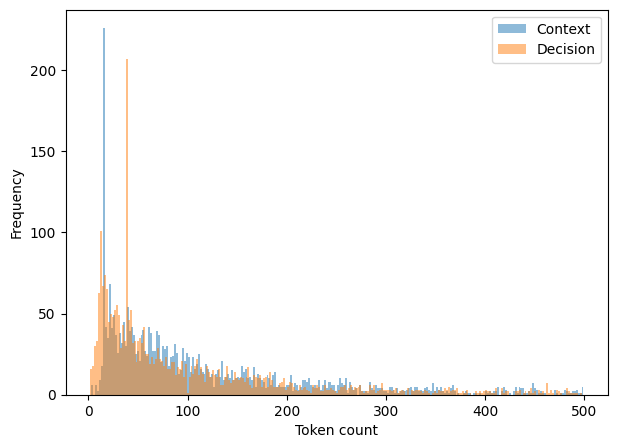

In [2]:
# Plot the histogram of the token count using log scale on y-axis
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

i = 'train'    
df_token_count = pd.read_csv(f"token_count_{i}.csv")

# Data fame where both input and output token count is less than 500 
df_token_count = df_token_count[
    (df_token_count["inp_count"] < 500) 
    &
      (df_token_count["out_count"] < 500)
      ]

# Get the frequency of each token count and plot the histogram
inp_count_freq = df_token_count["inp_count"].value_counts().sort_index()
out_count_freq = df_token_count["out_count"].value_counts().sort_index()

# bin_width = 10
# inp_bins = pd.cut(df_token_count["inp_count"], bins=range(0, 500 + bin_width, bin_width))
# out_bins = pd.cut(df_token_count["out_count"], bins=range(0, 500 + bin_width, bin_width))

# # Calculate the frequency of each bin
# inp_count_freq = inp_bins.value_counts().sort_index()
# out_count_freq = out_bins.value_counts().sort_index()

plt.figure(figsize=(7, 5))
plt.hist(df_token_count["inp_count"], alpha=0.5, label="Context", bins=250)
plt.hist(df_token_count["out_count"], alpha=0.5, label="Decision", bins=250)
# plt.yscale("log")
plt.legend()
plt.xlabel("Token count")
plt.ylabel("Frequency")
# plt.title(f"Token count distribution ({i})")
plt.savefig(f"token_count_{i}.png")
plt.show()

In [3]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Histogram(x=df_token_count["inp_count"], name="Context", opacity=0.8, nbinsx=250))
fig.add_trace(go.Histogram(x=df_token_count["out_count"], name="Decision", opacity=0.8, nbinsx=250))

fig.update_layout(
    barmode='overlay',
    xaxis_title_text='Token count',
    yaxis_title_text='Frequency',
    legend_title_text='Type',
    legend=dict(
        x=1, y=1, 
        xanchor='right', 
        yanchor='top', 
        traceorder='normal', 
        bgcolor='rgba(0,0,0,0)'
    ),
    width=600,
    height=400
)
# tight layout
fig.update_layout(margin=dict(l=0, r=10, t=10, b=10))
fig.show()

# save the plot
fig.write_image("token_count_hist.png", scale=2)

In [4]:
df_token_count["inp_count"].median()

np.float64(78.0)

In [5]:
out_count_freq.argmax()

np.int64(37)

In [6]:
# find median of token count
df_token_count["out_count"].median()

np.float64(56.0)